# Credit Risk Modelling

### Phuoc Tran October 2022

### I. Introduction
**1. Overview**

Credit scoring algorithms, which make a guess at the probability that a debtors default their loans, are the method banks use to determine whether or not a loan should be granted. Hence, this model can help credit originators in their decision making.

The given dataset for this model is a collection of information of credit card user and their defaulted behaviors in the last past 2 years, consisting factors such as: age, debt-to-limit ratio, number of dependents per person, number of loans,...). The goal of this project is to evaluate the effect of these factors to the probability of default on credit card loans.

**2. Dataset information**

**a. Data source**: 
    Kaggle (dataset: Give Me Some Credit contest https://www.kaggle.com/competitions/GiveMeSomeCredit/data)
    
**b. Data dictionary:**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
import pathlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import rcParams
from optbinning import OptimalBinning
import warnings
warnings.filterwarnings('ignore')

In [2]:
dictionary = pd.read_excel("/Users/phuoctran/Desktop/Credit Risk Modeling Project/GiveMeSomeCredit/Data Dictionary.xls")
dictionary

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


### II. Exploratory Data Analysis (EDA)

In [3]:
#Importing datasets
train_df = pd.read_csv("/Users/phuoctran/Desktop/Credit Risk Modeling Project/GiveMeSomeCredit/cs-training.csv")
test_df = pd.read_csv("/Users/phuoctran/Desktop/Credit Risk Modeling Project/GiveMeSomeCredit/cs-test.csv")
sample_df = pd.read_csv("/Users/phuoctran/Desktop/Credit Risk Modeling Project/GiveMeSomeCredit/sampleEntry.csv")

**a. Explore data**

In [4]:
#Explore the dataset:
train_df.info()
#Rename column names
train_df = train_df.rename(columns={'Unnamed: 0': 'Customer_ID'})
test_df = test_df.rename(columns={'Unnamed: 0': 'Customer_ID'})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

**b. Missing value**

In [5]:
train_df.isna().sum()

Customer_ID                                 0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

MonthlyIncome has 29731 NaNs, NumberOfDependents has 3924 NaNs

**c. Descriptive Statistics**

In [6]:
train_df.describe()

,Customer_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


<h6>There are few noticeably strange patterns spotted in the dataset:<h6>
    
- The number of defaulted borrowers only account for 6% of the sample
    
- Min age is 0, how possible a baby could obtain and default a loan?
    
- Monthly income has a minimum of 0, and too signficant maximum of 3.008750e+06
    
- Is it possible for a person to default their loan up to 98 times in a 2-year period?

In [7]:
num_f =['RevolvingUtilizationOfUnsecuredLines','age','MonthlyIncome','DebtRatio','NumberOfDependents','NumberOfOpenCreditLinesAndLoans','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberRealEstateLoansOrLines']
cat_f = ['SeriousDlqin2yrs','NumberOfTimes90DaysLate']

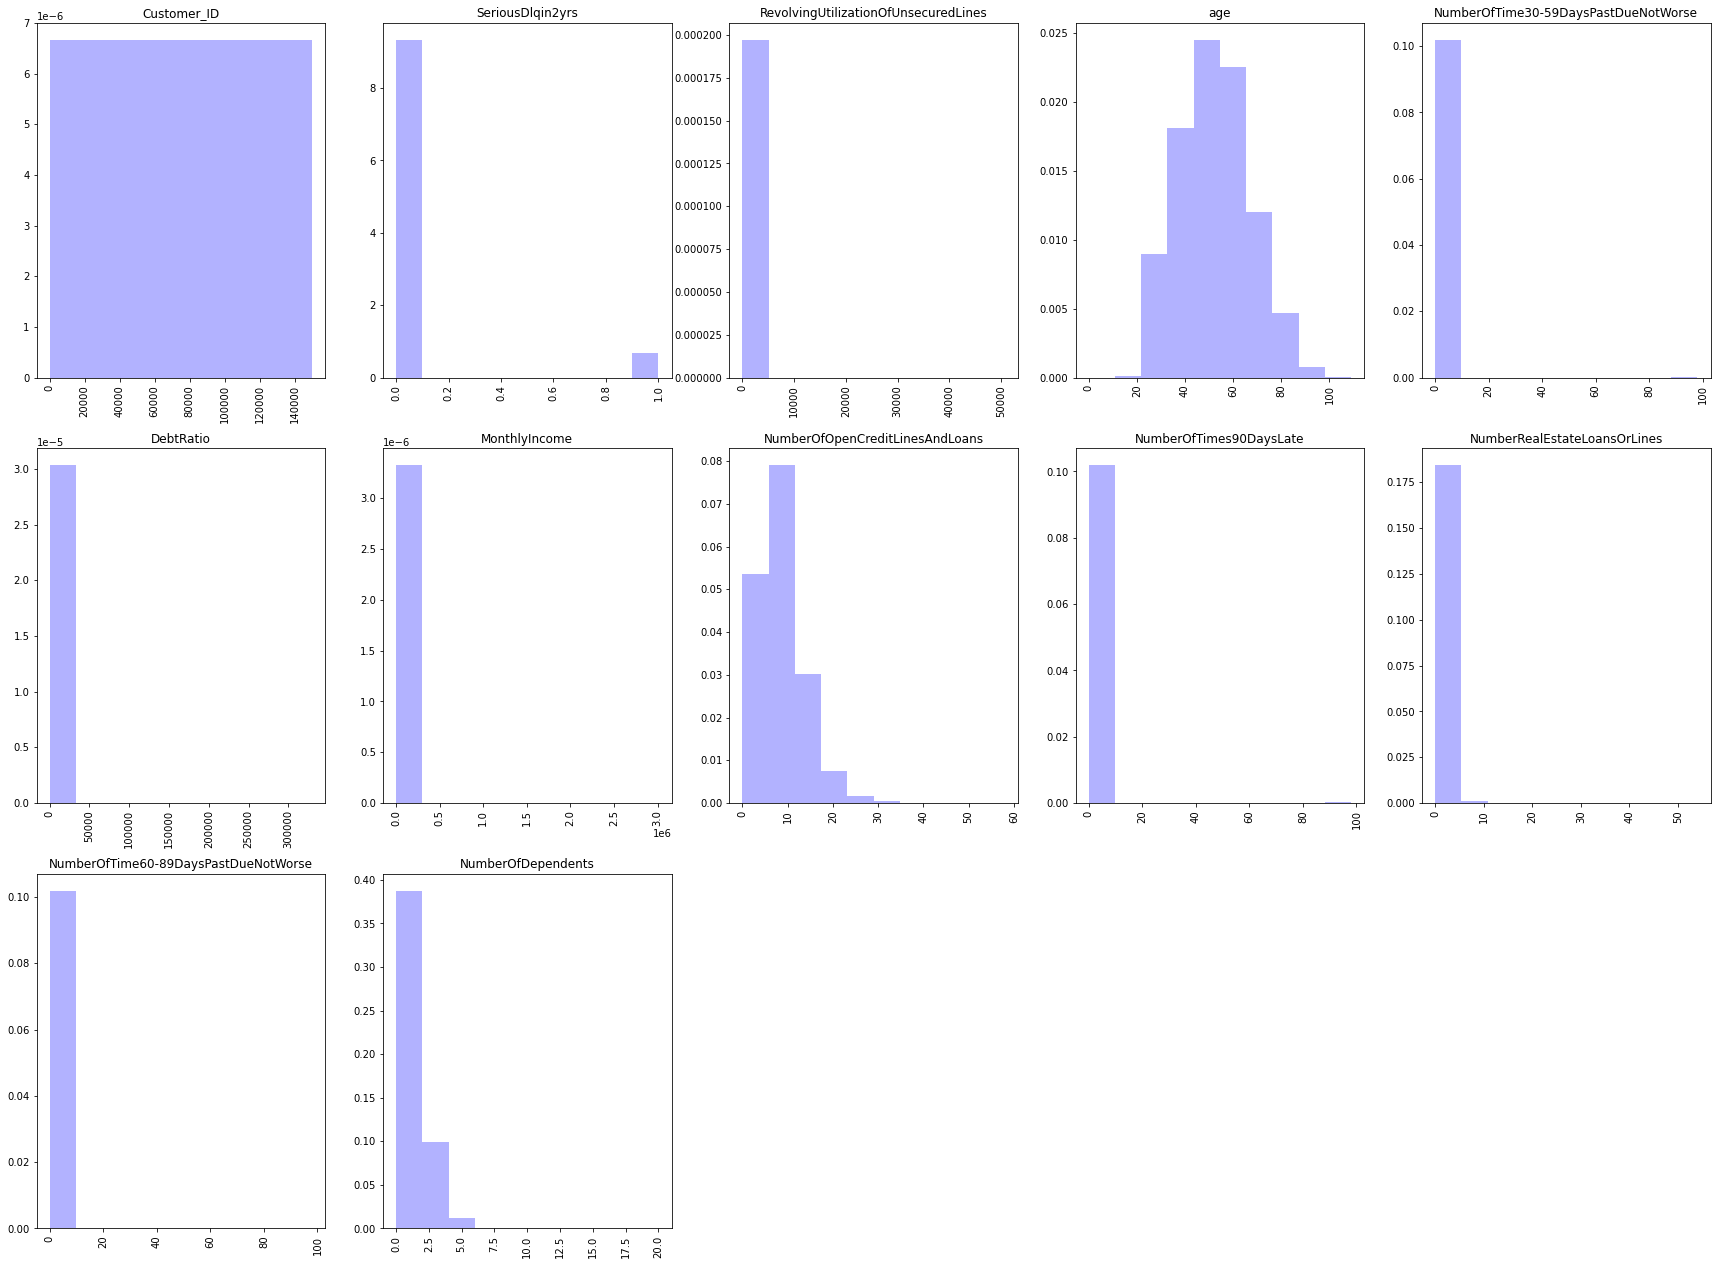

In [8]:
plt.figure(figsize=(30,30))
for i, col in enumerate(train_df.columns):
    plt.subplot(4,5,i+1)
    plt.hist(train_df[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

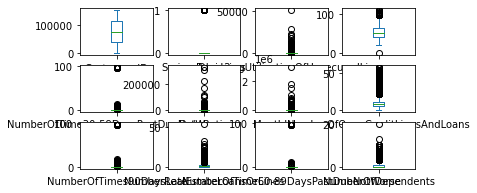

<Figure size 7200x7200 with 0 Axes>

In [9]:
train_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.figure(figsize=(100,100))
plt.show()

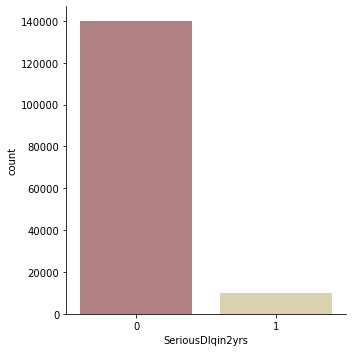

In [10]:
sns.catplot(x='SeriousDlqin2yrs',kind = 'count',label='SeriousDlqin2yrs',palette = 'pink',data = train_df)
plt.subplots_adjust(hspace=0.5)

In [11]:
def plot_distributions_int64(feature):
    
    _, axes = plt.subplots(1,2,figsize=(12,4))
    sns.histplot(train_df[feature],kde = True, label = 'Train', stat= 'density',
                 discrete=True,color='pink',alpha=0.6,ax=axes[0])
    axes[0].legend()
    axes[0].set_title('Distribution')
    
    sns.boxplot(x='SeriousDlqin2yrs',y=feature, data=train_df, ax=axes[1], palette=['seagreen','tan'])
    
    X = train_df[[feature]].dropna()
    
    plt.suptitle('{} distributions'.format(feature),y=1.15);

In [12]:
def plot_distributions_float(feature):
    
    _,axes = plt.subplots(1,2, figsize=(12,4))
    sns.kdeplot(train_df[feature].apply(np.log1p), label ='Train',
                color='yellow', alpha = 0.5, shade = True, edgecolor = 'k', ax=axes[0])
    
    axes[0].legend()
    axes[0].set_title('Distribution')
    axes[0].set_xlabel('{}'.format(feature))
    
    sns.boxplot(x='SeriousDlqin2yrs', y=train_df[feature],
                data=train_df, ax=axes[1],palette=['seagreen','tan'])
    
    X = train_df[[feature]].dropna()
    
    plt.suptitle('"{}" distributions'.format(feature), y= 1.15);

***(i)Age***

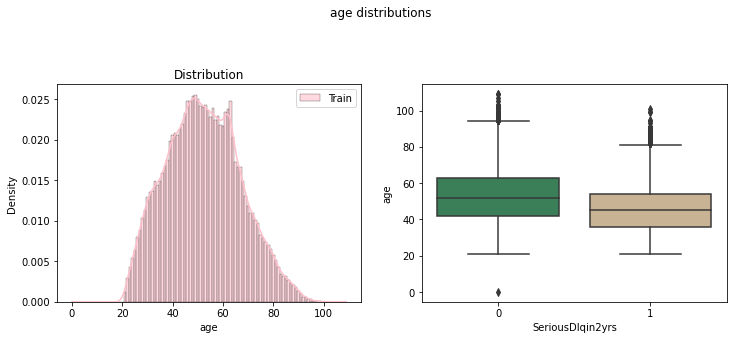

In [13]:
plot_distributions_int64('age')

In [14]:
#Bin group:

condition_age = [(train_df['age'] >= 0) & (train_df['age'] <= 30),
                 (train_df['age'] > 30) & (train_df['age'] <= 37),
                 (train_df['age'] > 37) & (train_df['age'] <= 44),
                 (train_df['age'] > 44) & (train_df['age'] <= 48),
                 (train_df['age'] > 48) & (train_df['age'] <= 50),
                 (train_df['age'] > 50) & (train_df['age'] <= 53),
                 (train_df['age'] > 53) & (train_df['age'] <= 56),
                 (train_df['age'] > 56) & (train_df['age'] <= 60),
                 (train_df['age'] > 60) & (train_df['age'] <= 63),
                 (train_df['age'] > 63) & (train_df['age'] <= 68),
                 (train_df['age'] > 68) & (train_df['age'] <= 75),
                 (train_df['age'] > 75)]

value_age = ['21-30', '30-37', '37-44', '44-48', '48-50', '50-53' , '53-56' , '56-60' , '60-63', '63-68', '68-75', '>75']
train_df['age_group'] = np.select(condition_age, value_age)

#Count frequency of 0 and 1 in each group:
age_1 = train_df[['age_group', 'SeriousDlqin2yrs']]
total_age_bin = age_1.groupby(by=['age_group'],as_index = False).agg('count')
age_default = age_1.groupby(by=['age_group'],as_index= False).agg('sum')
age_default_ratio = total_age_bin.merge(age_default, how='outer', on='age_group')
age_default_ratio.columns = ['age_group', 'Total', 'Default']
age_default_ratio['default_rate'] = age_default_ratio.eval('Default/Total*100')
age_default_ratio['non_default_rate'] = age_default_ratio.eval('((Total-Default)/Total)*100')
age_default_ratio
                 

,age_group,Total,Default,default_rate,non_default_rate
0,21-30,10758,1244,11.563488,88.436512
1,30-37,15628,1611,10.308421,89.691579
2,37-44,21417,1880,8.778073,91.221927
3,44-48,14741,1200,8.140560,91.859440
4,48-50,7590,592,7.799736,92.200264
5,50-53,10884,814,7.478868,92.521132
6,53-56,10566,671,6.350558,93.649442
7,56-60,13356,664,4.971548,95.028452
8,60-63,10809,474,4.385235,95.614765
9,63-68,12884,391,3.034772,96.965228


<AxesSubplot:xlabel='age_group', ylabel='default_rate'>

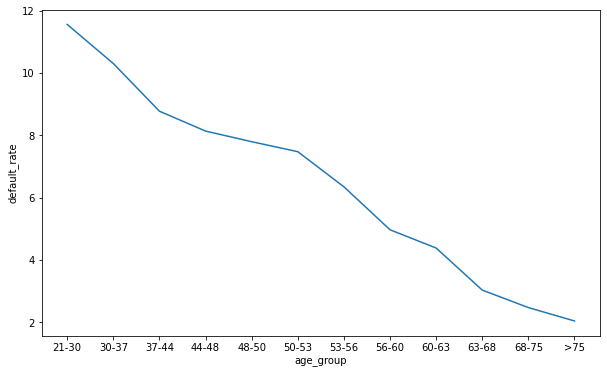

In [15]:
rcParams['figure.figsize'] = 10,6
sns.lineplot(data=age_default_ratio, x = 'age_group',y = 'default_rate')

Younger people tend to have a higher default rate than older people

***(ii) Revolving Utilization***

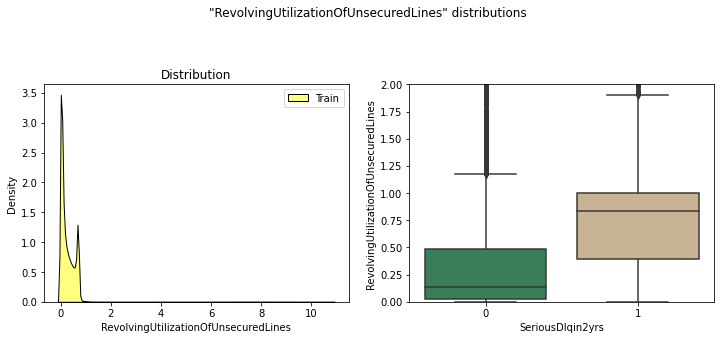

In [16]:
plot_distributions_float('RevolvingUtilizationOfUnsecuredLines')
plt.gca().set_ylim(0,2);

In [17]:
x = train_df['RevolvingUtilizationOfUnsecuredLines'].values
y = train_df['SeriousDlqin2yrs']

optb3 = OptimalBinning(name='Revolving Utilization', dtype="numerical",solver="cp")
optb3.fit(x,y)
revolv = optb3.binning_table.build()
revolv_bin = revolv[['Bin','Count','Non-event','Event','Event rate']]
revolv_bin.loc[0:8]

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 0.06)",52081,51173,908,0.017434
1,"[0.06, 0.13)",18962,18560,402,0.021200
2,"[0.13, 0.22)",12911,12509,402,0.031136
3,"[0.22, 0.30)",9027,8676,351,0.038883
4,"[0.30, 0.39)",7769,7364,405,0.052130
5,"[0.39, 0.49)",7611,7122,489,0.064249
6,"[0.49, 0.70)",11599,10499,1100,0.094836
7,"[0.70, 0.90)",10172,8662,1510,0.148447
8,"[0.90, inf)",19868,15409,4459,0.224431


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

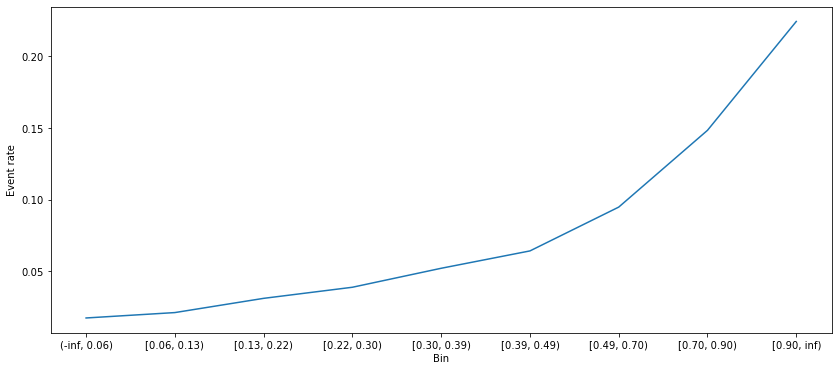

In [18]:
rcParams['figure.figsize']=14,6
sns.lineplot(data=revolv_bin.loc[0:8],x="Bin",y="Event rate")

For revolving utilization, the default rate is positively correlated with this indicator: it increases as the ratio increases. It can be as important as age in determining the outcome of this model.

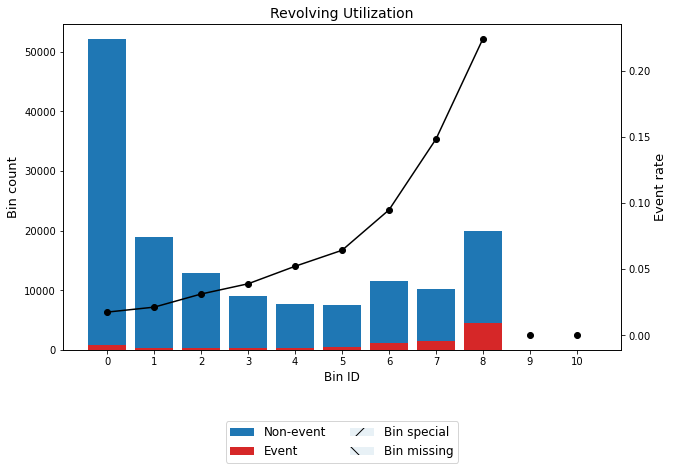

In [19]:
rcParams['figure.figsize'] = 10, 6
optb3.binning_table.plot(metric = "event_rate")

**(iii) Debt Ratio**

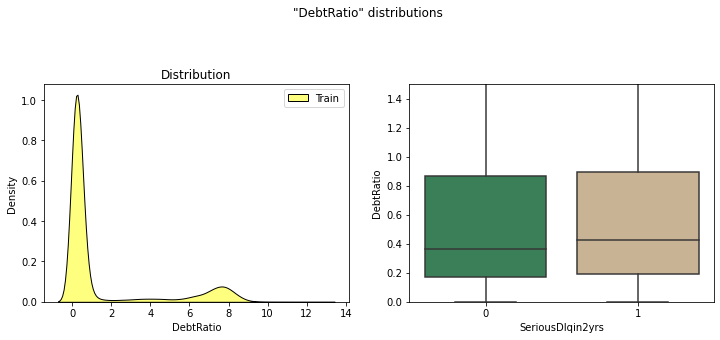

In [20]:
plot_distributions_float('DebtRatio')
plt.gca().set_ylim(0,1.5);

In [21]:
train_df.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Does it make sense when someone own 66,106 times more than the income they make ?

In [22]:
train_df[train_df['DebtRatio'] > 1000][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,16892.000000,1000.000000
mean,0.049076,0.217000
std,0.216034,0.412409
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


Observations that have debt ratio over 1000 only have their income = 1 or 0

In [23]:
x = train_df['DebtRatio'].values
y = train_df['SeriousDlqin2yrs']
optbl = OptimalBinning(name = 'DebtRatio', dtype = 'numerical', solver ="cp")
optbl.fit(x, y)
debt = optbl.binning_table.build()
debt_bin = debt[['Bin','Count','Non-event','Event','Event rate']]
debt_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 0.02)",13043,12384,659,0.050525
1,"[0.02, 0.35)",58248,54765,3483,0.059796
2,"[0.35, 0.42)",12807,11996,811,0.063325
3,"[0.42, 0.51)",10183,9444,739,0.072572
4,"[0.51, 0.65)",10998,10009,989,0.089925
5,"[0.65, 3.97)",14652,12965,1687,0.115138
6,"[3.97, 995.50)",13144,12316,828,0.062995
7,"[995.50, inf)",16925,16095,830,0.049040
8,Special,0,0,0,0.000000
9,Missing,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

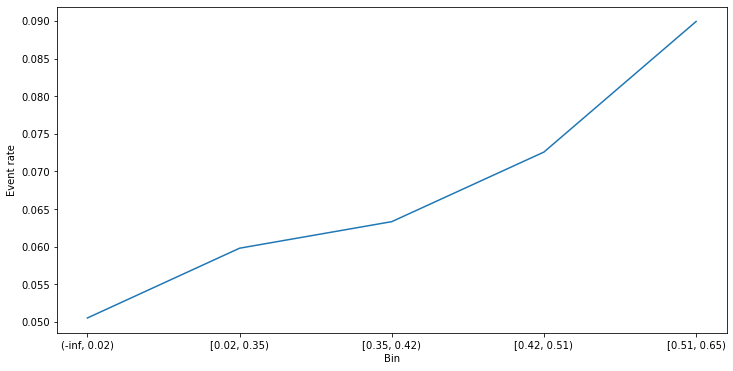

In [24]:
rcParams['figure.figsize'] = 12, 6
sns.lineplot(data = debt_bin[0:5], x = 'Bin', y='Event rate')

The higher the debt ratio is, the higher the deliquency rate (default rate) will be. Hence, there is a positive correlation between two variables

**(iv) Monthly Income**

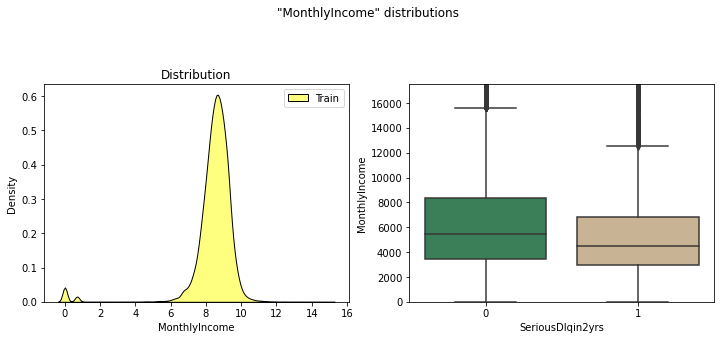

In [25]:
plot_distributions_float('MonthlyIncome')
plt.gca().set_ylim(0,17500);

In [26]:
train_df.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [27]:
x = train_df['MonthlyIncome'].values
y = train_df['SeriousDlqin2yrs']
optbl = OptimalBinning(name = 'MonthlyIncome', dtype = 'numerical', solver ="cp")
optbl.fit(x, y)
debt = optbl.binning_table.build()
debt_bin = debt[['Bin','Count','Non-event','Event','Event rate']]
debt_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 1508.50)",7640,7080,560,0.073298
1,"[1508.50, 2569.50)",10929,9879,1050,0.096075
2,"[2569.50, 3459.50)",12232,11006,1226,0.100229
3,"[3459.50, 4831.50)",20911,19191,1720,0.082253
4,"[4831.50, 5320.50)",7611,7068,543,0.071344
5,"[5320.50, 6643.50)",16128,15050,1078,0.066840
6,"[6643.50, 7656.50)",9903,9353,550,0.055539
7,"[7656.50, 9945.50)",14975,14207,768,0.051285
8,"[9945.50, inf)",19940,19078,862,0.043230
9,Special,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

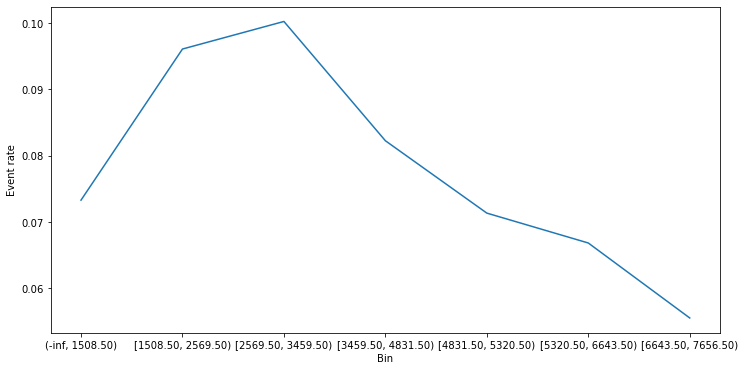

In [28]:
rcParams['figure.figsize'] = 12, 6
sns.lineplot(data = debt_bin[0:7], x = 'Bin', y='Event rate')

The lineplot illustrate a negative correlation between income level and default rate

**(v) Number of Loans**

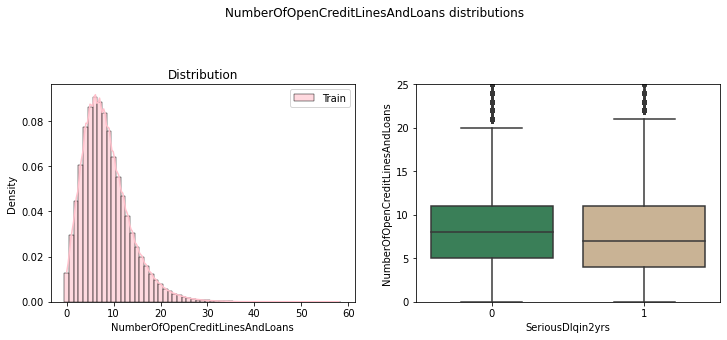

In [29]:
plot_distributions_int64('NumberOfOpenCreditLinesAndLoans')
plt.gca().set_ylim(0,25);

In [30]:
train_df.NumberOfOpenCreditLinesAndLoans.describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [31]:
x = train_df['NumberOfOpenCreditLinesAndLoans'].values
y = train_df['SeriousDlqin2yrs']
optbl = OptimalBinning(name = 'NumberOfOpenCreditLinesAndLoans', dtype = 'numerical', solver ="cp")
optbl.fit(x, y)
debt = optbl.binning_table.build()
debt_bin = debt[['Bin','Count','Non-event','Event','Event rate']]
debt_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 2.50)",12992,11314,1678,0.129156
1,"[2.50, 3.50)",9058,8376,682,0.075293
2,"[3.50, 4.50)",11609,10866,743,0.064002
3,"[4.50, 5.50)",12931,12112,819,0.063336
4,"[5.50, 7.50)",26859,25358,1501,0.055884
5,"[7.50, 8.50)",12562,11956,606,0.048241
6,"[8.50, 11.50)",29300,27591,1709,0.058328
7,"[11.50, 13.50)",12672,11921,751,0.059265
8,"[13.50, inf)",22017,20480,1537,0.069810
9,Special,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

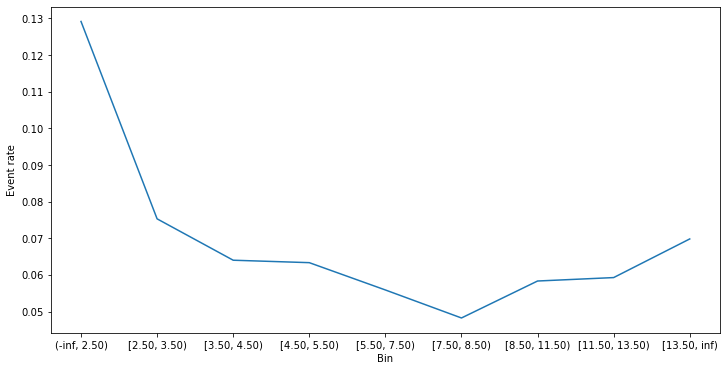

In [32]:
rcParams['figure.figsize'] = 12, 6
sns.lineplot(data = debt_bin[0:9], x = 'Bin', y='Event rate')

**(vi) Number of Real Estate Loans**

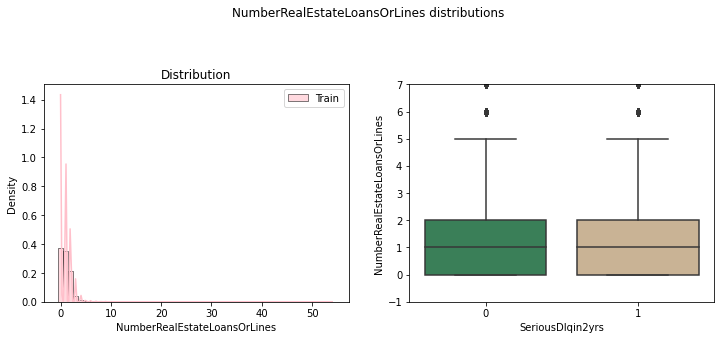

In [33]:
plot_distributions_int64('NumberRealEstateLoansOrLines')
plt.gca().set_ylim(-1,7);

In [34]:
train_df.NumberRealEstateLoansOrLines.describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [35]:
x = train_df['NumberRealEstateLoansOrLines'].values
y = train_df['SeriousDlqin2yrs']
optbl = OptimalBinning(name = 'NumberRealEstateLoansOrLines', dtype = 'numerical', solver ="cp")
optbl.fit(x, y)
debt = optbl.binning_table.build()
debt_bin = debt[['Bin','Count','Non-event','Event','Event rate']]
debt_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 0.50)",56188,51516,4672,0.083149
1,"[0.50, 1.50)",52338,49590,2748,0.052505
2,"[1.50, 2.50)",31522,29757,1765,0.055993
3,"[2.50, inf)",9952,9111,841,0.084506
4,Special,0,0,0,0.000000
5,Missing,0,0,0,0.000000
Totals,,150000,139974,10026,0.066840


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

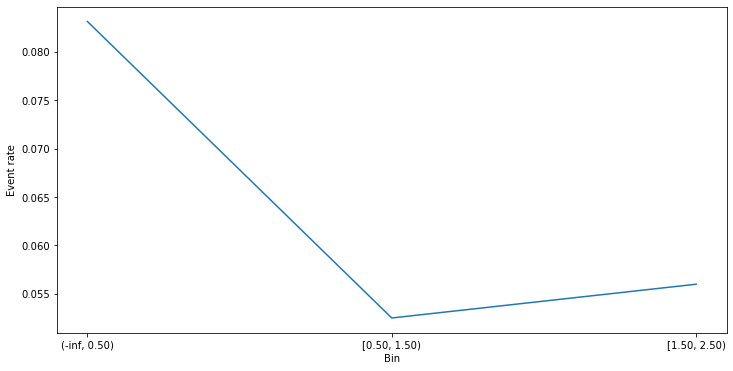

In [36]:
rcParams['figure.figsize'] = 12, 6
sns.lineplot(data = debt_bin[0:3], x = 'Bin', y='Event rate')

**(vii) Number of Dependents**

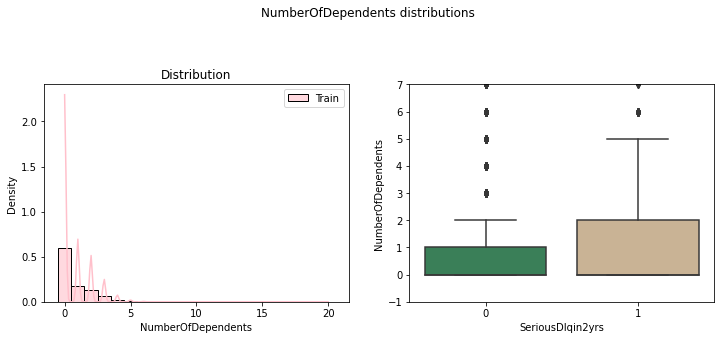

In [37]:
plot_distributions_int64('NumberOfDependents')
plt.gca().set_ylim(-1,7);

In [38]:
train_df.NumberOfDependents.describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [39]:
x = train_df['NumberOfDependents'].values
y = train_df['SeriousDlqin2yrs']
optbl = OptimalBinning(name = 'NumberOfDependents', dtype = 'numerical', solver ="cp")
optbl.fit(x, y)
debt = optbl.binning_table.build()
debt_bin = debt[['Bin','Count','Non-event','Event','Event rate']]
debt_bin

,Bin,Count,Non-event,Event,Event rate
0,"(-inf, 0.50)",86902,81807,5095,0.058629
1,"[0.50, 1.50)",26316,24381,1935,0.073529
2,"[1.50, 2.50)",19522,17938,1584,0.081139
3,"[2.50, inf)",13336,12103,1233,0.092457
4,Special,0,0,0,0.000000
5,Missing,3924,3745,179,0.045617
Totals,,150000,139974,10026,0.066840


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

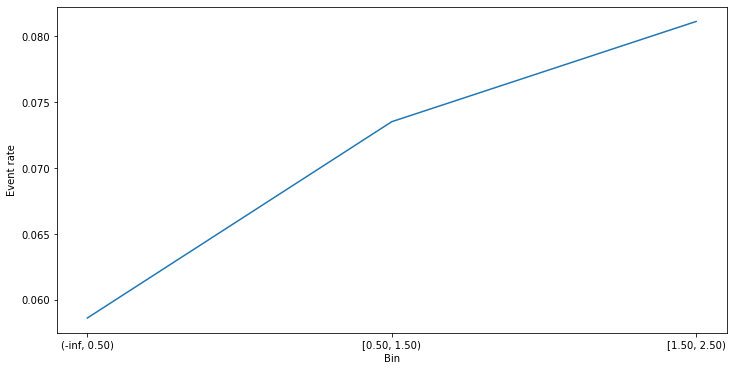

In [40]:
rcParams['figure.figsize'] = 12, 6
sns.lineplot(data = debt_bin[0:3], x = 'Bin', y='Event rate')

***(viii) Number of delinquency days***

In [41]:
train_df.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In the past 2 years, there were 264 people defaulted 98 times, and there is no person defaulted > 17 times and < 96 times

In [42]:
train_df[train_df['NumberOfTimes90DaysLate'] > 95][['SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,SeriousDlqin2yrs,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,97.962825
std,0.498764,0.270628,0.270628,0.270628
min,0.000000,96.000000,96.000000,96.000000
25%,0.000000,98.000000,98.000000,98.000000
50%,1.000000,98.000000,98.000000,98.000000
75%,1.000000,98.000000,98.000000,98.000000
max,1.000000,98.000000,98.000000,98.000000


It makes sense when people keeps defaulted, but they defaulted at a massive rate (>50%). So it could be insightful to us.

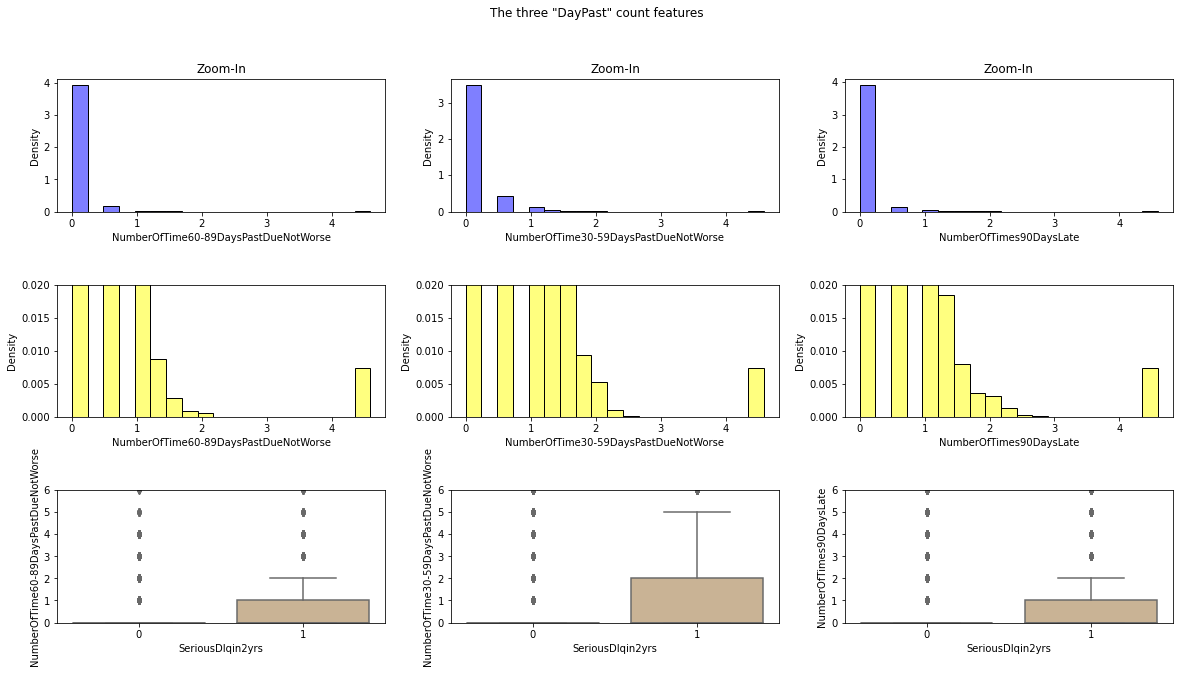

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.55)
for i, feature in enumerate(['NumberOfTime60-89DaysPastDueNotWorse',
                             'NumberOfTime30-59DaysPastDueNotWorse',
                             'NumberOfTimes90DaysLate']):
    sns.histplot(train_df[feature].apply(np.log1p), label='Train',stat='density',
                 color='blue', alpha=0.5,edgecolor='k',ax=axes[0][i])
    sns.histplot(train_df[feature].apply(np.log1p), label='Train',stat='density',
                 color='yellow', alpha=0.5,edgecolor='k',ax=axes[1][i])
    sns.boxplot(x='SeriousDlqin2yrs',y=train_df[feature],
                data=train_df,ax=axes[2][i],palette=['tan'])
    axes[0][i].set_title('{} - {}'.format(i+1,feature))
    axes[0][i].set_title('Zoom-In')
    axes[1][i].set_ylim(0, 0.02)
    axes[2][i].set_ylim(0, 6)
plt.suptitle('The three "DayPast" count features');

In [44]:
train_df[train_df['NumberOfTimes90DaysLate']>=96][['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse']].drop_duplicates()

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
1733,98,98,98
41944,96,96,96


In [45]:
#Bin group:
condition_due = [(train_df['NumberOfTime30-59DaysPastDueNotWorse']>=0) &
                 (train_df['NumberOfTime30-59DaysPastDueNotWorse'] <= 1),
                 (train_df['NumberOfTime30-59DaysPastDueNotWorse']>1) &
                 (train_df['NumberOfTime30-59DaysPastDueNotWorse'] <= 2),
                 (train_df['NumberOfTime30-59DaysPastDueNotWorse']>2)]
value_due=['0-1','1-2','>2']
train_df['30dayspastdue']=np.select(condition_due, value_due)

#Count frequency of 0 and 1 in each group
duel = train_df[['30dayspastdue','SeriousDlqin2yrs']]
total_due_bin = duel.groupby(by=['30dayspastdue'],as_index=False).agg('count')
due_default = duel.groupby(by=['30dayspastdue'],as_index=False).agg('sum')
due_default_ratio=total_due_bin.merge(due_default, how='outer',on ='30dayspastdue')
due_default_ratio.columns=['30dayspastdue','Total','Default']
due_default_ratio['default_rate']=due_default_ratio.eval('Default/Total*100')
due_default_ratio['non_default_rate']= due_default_ratio.eval('((Total-Default)/Total)*100')
due_default_ratio

,30dayspastdue,Total,Default,default_rate,non_default_rate
0,0-1,142051,7450,5.244595,94.755405
1,1-2,4598,1219,26.511527,73.488473
2,>2,3351,1357,40.495375,59.504625


<AxesSubplot:xlabel='30dayspastdue', ylabel='default_rate'>

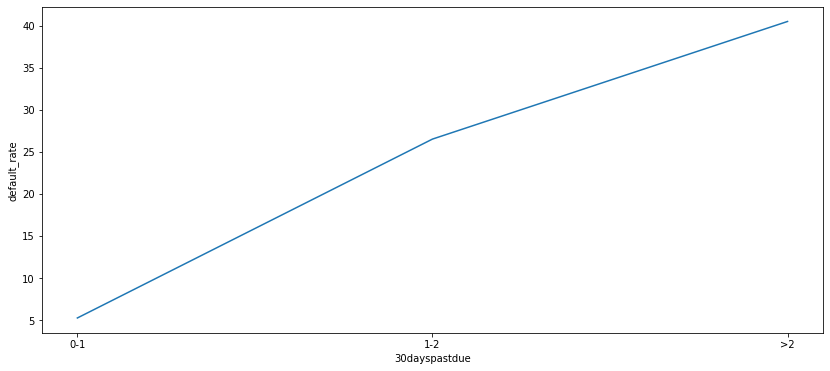

In [46]:
rcParams['figure.figsize']= 14, 6
sns.lineplot(data = due_default_ratio, x = '30dayspastdue', y = 'default_rate')

## b. Missing Value

In [47]:
train_df.isnull().sum()

Customer_ID                                 0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
age_group                                   0
30dayspastdue                               0
dtype: int64

The missing value for Monthly Income seems to be relative high (~20% of the dataset). First we will explore the missing value of Income to see whether should we impute mean or median into missing value, and to see if the person with missing Monthly Income have a high rate of default.
The missing values for Number of Dependents is **3924**, which account for **nearly 2.5% of the dataset**.

In [48]:
#Should we impute mean, mode or median?
train_df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

As we can see, there are extreme outliers for this outliers when Monthly Income could range from 0 to millions

Thus the method of imputing mean would not be applicable here.

The use of median imputation might be more appropriate for this situation.

In [49]:
#Now we evaluate the missing value in Number of Dependents.
train_df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

It is obvious to see that at least >= of the dataset, Number of Dependents is only 0. There is a high chance that the number of dependents of 1 accounts for 25% of the dataset. However, the maximum number of dependent is 20.

Will it be okay if we fill NA values with mean? if not mean, how can mode or median be more appropriate?

The default rate is normal for this particular group. Thus for these missing values, we should fill by median.

In [50]:
train_df.fillna(train_df.median(), inplace = True)
train_df.isnull().sum()

Customer_ID                             0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
age_group                               0
30dayspastdue                           0
dtype: int64

## c. Outliers

IndexError: index 3 is out of bounds for axis 0 with size 3

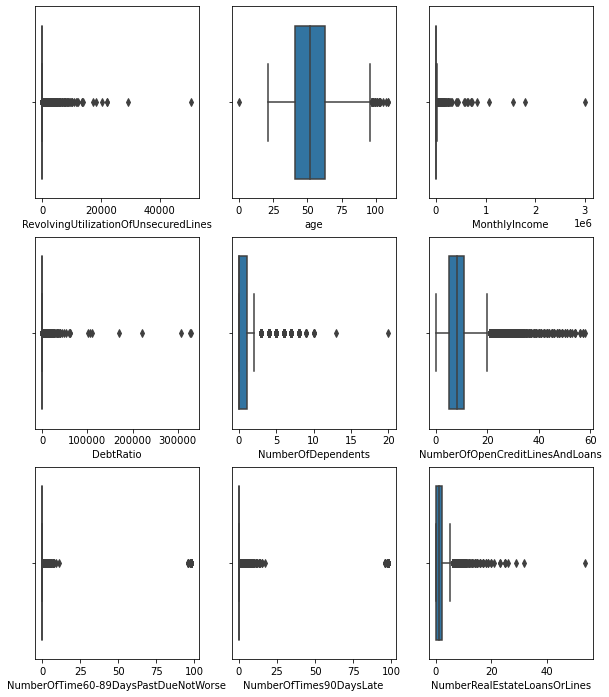

In [51]:
#Box plot visualization to detect outlier:
fig,axes = plt.subplots(3,3,figsize=(10,12))
for index, col in enumerate(num_f):
    x,y = index//3,index%3
    sns.boxplot(train_df[col],ax=axes[x,y])

In [ ]:
def outlier(df, column):
    first_qrt = np.quantile(df[column],0.25)
    third_qrt = np.quantile(df[column],0.75)
    lower_whisker = first_qrt - (third_qrt - first_qrt)*1.5
    upper_whisker = third_qrt + (third_qrt - first_qrt)*1.5
    df_lower_outliers = df.loc[df[column] < lower_whisker]
    df_upper_outliers = df.loc[train_df[column] > upper_whisker]
    print(column,':',len(df_lower_outliers),'-',len(df_upper_outliers))

In [ ]:
for col in num_f:
    outlier(train_df,col)

In [ ]:
train_df.describe()

It seems that there are alot of outliers in our dataset, esepcially for the Monthly Income, Debt Ratio, Revolving Ultilization, Number of days past due, number of loans

In [57]:
import scipy
train_df['age'] = scipy.stats.mstats.winsorize(train_df['age'],limits = [0.0001,0.01])
train_df['NumberRealEstateLoansOrLines'] = scipy.stats.mstats.winsorize(train_df['NumberRealEstateLoansOrLines'],limits = [0,0.006])
train_df['NumberOfOpenCreditLinesAndLoans'] = scipy.stats.mstats.winsorize(train_df['NumberOfOpenCreditLinesAndLoans'],limits=  [0,0.1])
train_df['RevolvingUtilizationOfUnsecuredLines'] = scipy.stats.mstats.winsorize(train_df['RevolvingUtilizationOfUnsecuredLines'],limits = [0,0.01])
train_df['NumberOfDependents'] = scipy.stats.mstats.winsorize(train_df['NumberOfDependents'],limits = [0,0.089])
train_df['MonthlyIncome'] = scipy.stats.mstats.winsorize(train_df['MonthlyIncome'],limits = [0,0.22])
train_df['DebtRatio'] = scipy.stats.mstats.winsorize(train_df['DebtRatio'],limits = [0,0.21])
train_df['NumberOfTime30-59DaysPastDueNotWorse'] = scipy.stats.mstats.winsorize(train_df['NumberOfTime30-59DaysPastDueNotWorse'],limits = [0,0.01])
train_df['NumberOfTime60-89DaysPastDueNotWorse'] = scipy.stats.mstats.winsorize(train_df['NumberOfTime60-89DaysPastDueNotWorse'],limits = [0,0.002])

IndexError: index 3 is out of bounds for axis 0 with size 3

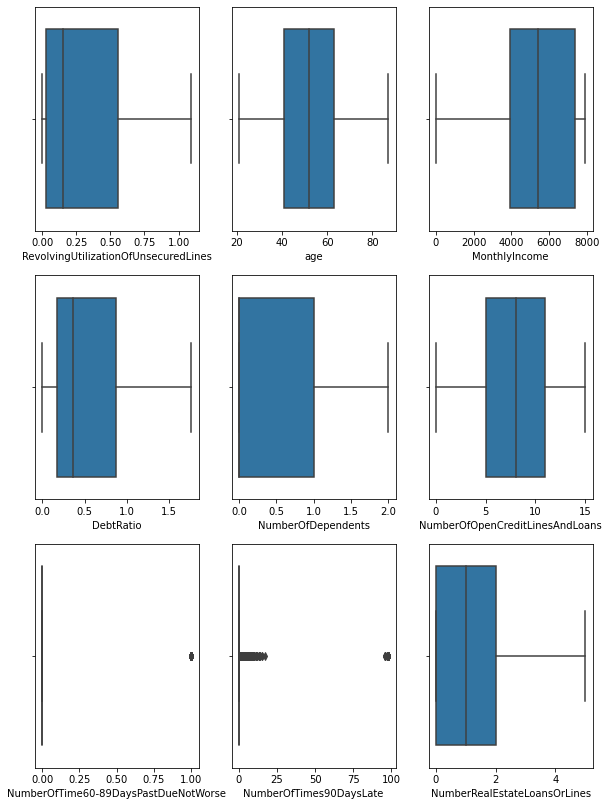

In [58]:
fig,axes = plt.subplots(3,3,figsize=(10,14))
for index, col in enumerate(num_f):
    x,y = index//3,index%3
    sns.boxplot(train_df[col],ax=axes[x,y])

## d. Feature selection

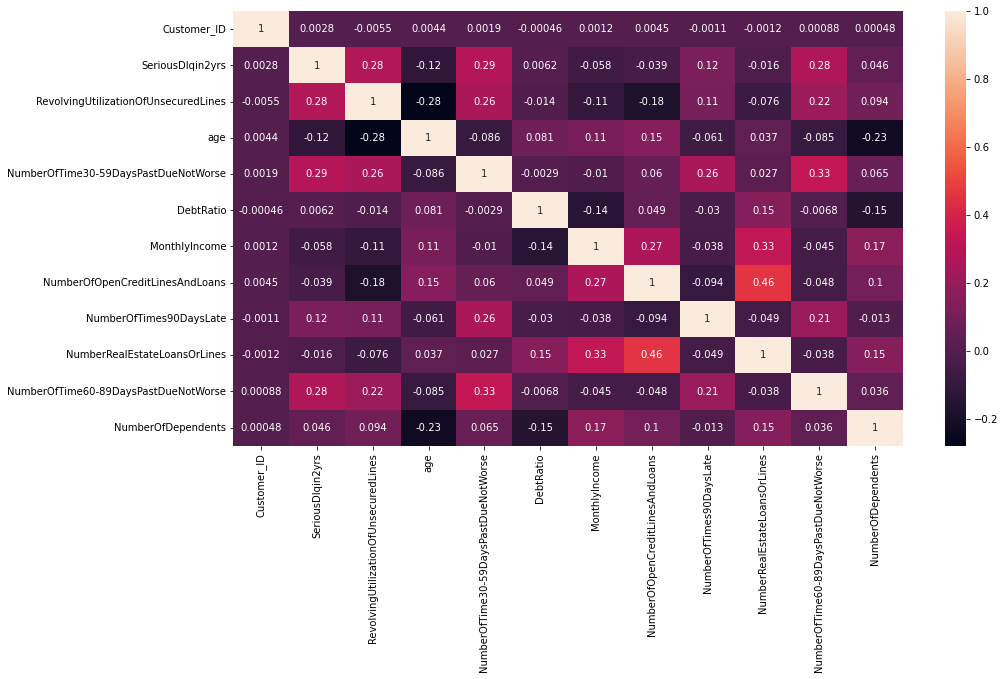

In [59]:
corrMatrix = train_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrMatrix, annot = True)
plt.show()

Based on the data exploratory, we can conclude that this data below is important and releveant to the outcome of this model without making it overfitting or under fitting:

- Revolving Utilization
- Age
- Debt Ratio
- Monthly Income
- Number of 30-59 days delinquency

As we can see from the correlation matrix, the relevant between 3 number of xx days deliquency is highly correlated with an correlation coefficient of 0.9. Thus we should drop two columns and keep only 30-59 days delinquency.


In [64]:
clean_train = train_df[['SeriousDlqin2yrs','NumberRealEstateLoansOrLines','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome']].copy()

In [65]:
clean_train.head()

,SeriousDlqin2yrs,NumberRealEstateLoansOrLines,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome
0,1,5,0.766127,45,0,2,0.802982,7916.0
1,0,0,0.957151,40,0,0,0.121876,2600.0
2,0,0,0.658180,38,1,1,0.085113,3042.0
3,0,0,0.233810,30,0,0,0.036050,3300.0
4,0,1,0.907239,49,0,1,0.024926,7916.0


## e. Oversampling

In [67]:
good = clean_train.SeriousDlqin2yrs.value_counts()[0]
bad = clean_train.SeriousDlqin2yrs.value_counts()[1]
numberbad= bad/(good+bad)*100
print('The number of good behavior is:',good)
print('The number of good behavior is:',bad)
print('The percentage of bad customer on this data set is:',numberbad,'%')

The number of good behavior is: 139974
The number of good behavior is: 10026
The percentage of bad customer on this data set is: 6.683999999999999 %


The imbalance dataset might affect the outcome of our model as it can be biased toward the majority (the good behavior). It might have a good accuracy rate, as it predicts the good behavior exactly, but when it comes to our target of classifying bad credit rate, it will not perform at its best since they keep predict that everyone is good.

To handle this problem, we should use Resampling technique. Since out dataset is large ~150,000 observations, we should use over-sampling technique (SMOTE). This method will select the minority of this dataset and then duplicate it.

In [74]:
from sklearn.model_selection import train_test_split
X = clean_train.drop("SeriousDlqin2yrs",axis = 1).copy()
y = clean_train.SeriousDlqin2yrs
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)

In [75]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =0)
print("Number X_train dataset: ", X_train.shape)
print("Number y_train dataset: ", y_train.shape)
print("Number X_test dataset: ", X_test.shape)
print("Number y_test dataset: ", X_test.shape)

Number X_train dataset:  (195963, 7)
Number y_train dataset:  (195963,)
Number X_test dataset:  (83985, 7)
Number y_test dataset:  (83985, 7)


In [77]:
sm = SMOTE(random_state =2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [80]:
print("Before Oversampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Oversampling, counts of label '0': {}".format(sum(y_train==0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_res.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_res.shape))

print("After Oversampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After Oversampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before Oversampling, counts of label '1': 98126
Before Oversampling, counts of label '0': 97837
After Oversampling, the shape of train_X: (196252, 7)
After Oversampling, the shape of train_y: (196252,) 

After Oversampling, counts of label '1': 98126
After Oversampling, counts of label '0': 98126


## III. Modelling

### 1.Logistic Regression

Logistic regression with class_weight = balanced to reduce the imbalance dataset effect

In [89]:
#Original Dataset:
X1 = clean_train.drop("SeriousDlqin2yrs", axis = 1).copy()
y1 = clean_train.SeriousDlqin2yrs
X1.shape, y1.shape
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size =0.3, random_state=0)

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(X1_train)
x1_test = sc.transform(X1_test)

Accuracy Score 0.7722222222222223
AUC Score 0.5752305793559321


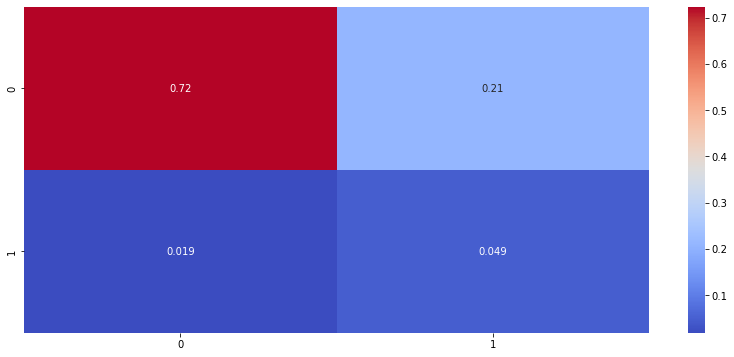

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix,classification_report

model_1 = LogisticRegression(random_state = 42, solver="saga", penalty="l1",class_weight="balanced",C=1000,max_iter =1000)
model_1.fit(x1_train, y1_train)

y_scores_proba1 = model_1.predict_proba(X1_train)
y_scores1 = y_scores_proba1[:,1]
cm = confusion_matrix(y1_test, model_1.predict(x1_test))
sns.heatmap(cm/np.sum(cm),annot=True, cmap='coolwarm')
print("Accuracy Score {}".format(accuracy_score(y1_test, model_1.predict(x1_test))))
print("AUC Score {}".format(roc_auc_score(y1_train,y_scores1)))

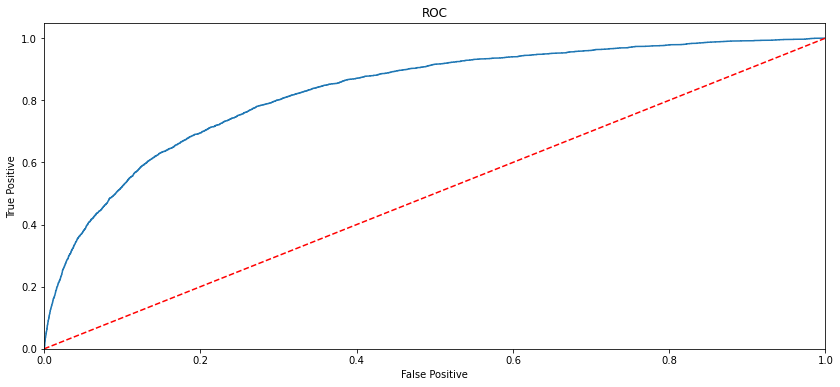

In [113]:
logit_roc_auc = roc_auc_score(y1_test, model_1.predict(x1_test))
fpr, tpr, thresholds = roc_curve(y1_test, model_1.predict_proba(x1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.show()

In [115]:
#Using oversampling
x_train = sc.fit_transform(X_train_res)
x_test = sc.transform(X_test)
model = LogisticRegression(random_state = 42, solver="saga",penalty='l1',class_weight="balanced",C=1000,max_iter=1000)
model.fit(x_train,y_train_res)
print("Accuracy Score {}".format(accuracy_score(y_test,model.predict(x_test))))

Accuracy Score 0.7526105852235518


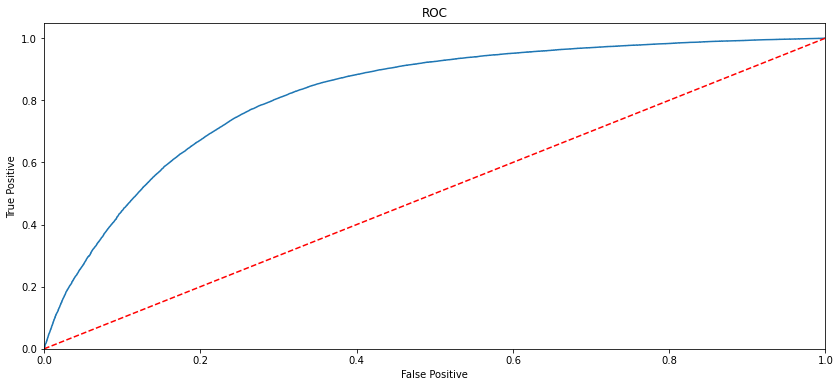

In [118]:
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1],[0, 1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC')
plt.show()

## 2. Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state =42, n_estimators = 300, max_depth = 5, class_weight = 'balanced')
forest.fit(X1_train,y1_train)
y_scores_proba = forest.predict_proba(X1_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y1_train,y_scores)
print("AUC Score {}".format(roc_auc_score(y1_train,y_scores)))

AUC Score 0.856677697412645


Text(0, 0.5, 'True Positive Rate')

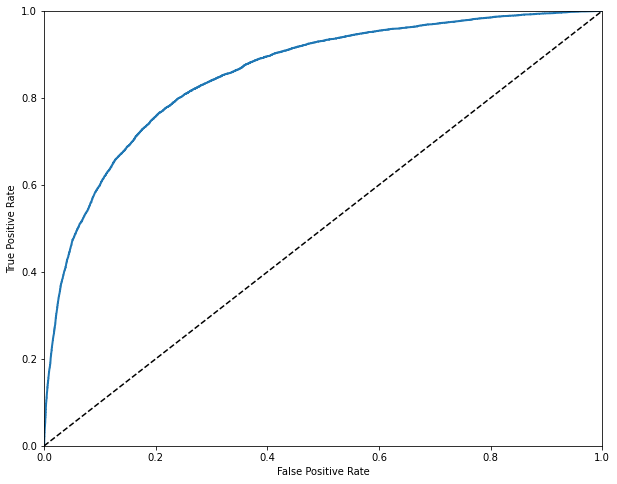

In [122]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1],"k--")
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

## 3. Gradient Boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(n_estimators=200, learning_rate =0.05, max_depth=4, random_state =42)
gbc_model.fit(X1_train,y1_train)
gbc_proba = gbc_model.predict_proba(X1_train)
gbc_scores = gbc_proba[:,1]
gbc_test_proba = gbc_model.predict_proba(X1_train)
gbc_test_scores = gbc_test_proba[:,1]
fpr_gbc, tpr_gbc, thresh_gbc = roc_curve(y1_train, gbc_test_scores)
print("AUC Score {}".format(roc_auc_score(y1_train,gbc_test_scores)))

AUC Score 0.8662281370389416


In [129]:
accuracy_score(y1_test,gbc_model.predict(x1_test))

0.9305777777777777